In [1]:
l2=["upfd","smfd","amfd","udmd","pcfd","udrd","ausfd","bsfd","nrfd","nssfd","mongo"]
l=["upfd","smfd","amfd","ausfd"]
cpu=[[]for i in range(len(l))]
memory=[[]for i in range(len(l))]
cpu_f=[]
mem_f=[]
sys_cpu=[]
x=[10,50,100,200,300,400,500]
for i in range(len(x)):
    temp_cpu=[[]for i in range(len(l))]
    temp_memory=[[]for i in range(len(l))]
    sys_cpu_temp=[]
    with open("data/registration/cpu/"+str(x[i])+".txt","r") as file:
        for line in file:
            if "%Cpu(s):" in line:
                sys_cpu_temp.append(100-float(line.split()[7]))
            for i in range(len(l)):
                if l[i] in line:
                    temp=line.split()
                    temp_cpu[i].append(float(temp[8]))
                    temp_memory[i].append(float(temp[9]))
    sys_cpu.append(sum(sys_cpu_temp)/len(sys_cpu_temp))
    for i in range(len(l)):
        if (len(temp_cpu[i])==0):
            cpu[i].append(0)
            memory[i].append(0)
        else:
            cpu[i].append(sum(temp_cpu[i])/(4*len(temp_cpu[i])) )
            memory[i].append(sum(temp_memory[i])/len(temp_memory[i]) )

In [2]:
def list_add(*a):
    c = [0]*len(a[0])
    for i in a:
        for j in range(len(i)):
            c[j]=c[j]+i[j]
    return c

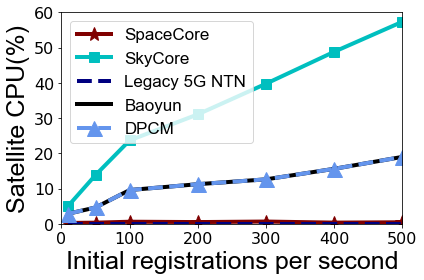

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
width = 0.6     
ind = np.arange(len(x))

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}

font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}
# For simplicity, we add it here as a constant list
mongo=[2.2323529411764707,
 9.214705882352943,
 14.095833333333333,
 19.815384615384614,
 27.142857142857142,
 33.222222222222221,
 38.363273524093919]



spacecore=list_add(cpu[0],cpu[3])
skycore=list_add(cpu[0],cpu[1],cpu[2],mongo)
ntn=[0 for i in range(len(cpu[0]))]
tiansuan=list_add(cpu[0],cpu[1],cpu[2])
dpcm=list_add(cpu[0],cpu[1],cpu[2])

plt.figure(figsize=(6, 4))

l1=plt.plot(x,spacecore,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')#remove "udmd","pcfd","udrd","ausfd"
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')

plt.ylim(0, 60)
plt.xlim(0, 500)
plt.xlabel("Initial registrations per second",font1)
plt.ylabel("Satellite CPU(%)",font1)
plt.legend(prop=font2,loc='upper left')

plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("figure17a-2.pdf")
plt.show()


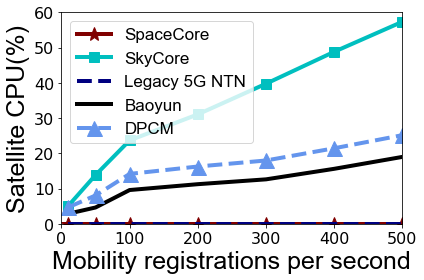

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
width = 0.6     # the width of the bars: can also be len(x) sequence
ind = np.arange(len(x))

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}

font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}
# For simplicity, we add it here as a constant list
mongo=[2.2323529411764707,
 9.214705882352943,
 14.095833333333333,
 19.815384615384614,
 27.142857142857142,
 33.222222222222221,
 38.363273524093919]
dpcm_decrypt_abe_cpu=[1.8145,3.42,4.5771,5.016,5.35154,5.833,6.16636364]

skycore=list_add(cpu[0],cpu[1],cpu[2],mongo)
ntn=[0 for i in range(len(cpu[0]))]
spacecore=ntn
tiansuan=list_add(cpu[0],cpu[1],cpu[2])
dpcm=list_add(cpu[0],cpu[1],cpu[2],dpcm_decrypt_abe_cpu)

plt.figure(figsize=(6, 4))

l1=plt.plot(x,ntn,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')#remove "udmd","pcfd","udrd","ausfd"
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')

plt.ylim(0, 60)
plt.xlim(0, 500)
plt.xlabel("Mobility registrations per second",font1)
plt.ylabel("Satellite CPU(%)",font1)
plt.legend(prop=font2)

plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("figure17c-2.pdf")
plt.show()


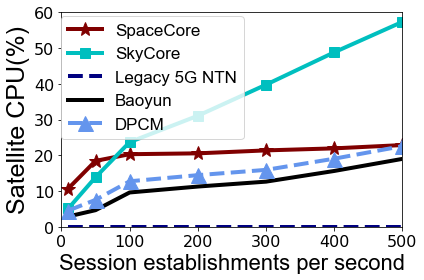

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
width = 0.6     # the width of the bars: can also be len(x) sequence
ind = np.arange(len(x))

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}

font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}
font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}
# For simplicity, we add it here as a constant list
mongo=[2.2323529411764707,
 9.214705882352943,
 14.095833333333333,
 19.815384615384614,
 27.142857142857142,
 33.222222222222221,
 38.363273524093919]

abe_delay=44 
pdu_num=[9.5,16.462962962962962,17.916666666666668,18.22680412371134,18.840425531914892,19.636363636363637,20.3855421686747]
spacecore_abe_cpu=[]
for i in pdu_num:
    spacecore_abe_cpu.append(abe_delay*i/40)

dpcm_delay=7
dpcm_decrypt_abe_cpu=[]
for i in pdu_num:
    dpcm_decrypt_abe_cpu.append(dpcm_delay*i/40)
spacecore=list_add(spacecore_abe_cpu,cpu[0],cpu[3])
skycore=list_add(cpu[0],cpu[1],cpu[2],mongo)
ntn=[0 for i in range(len(cpu[0]))]
tiansuan=list_add(cpu[0],cpu[1],cpu[2])
dpcm=list_add(cpu[0],cpu[1],cpu[2],dpcm_decrypt_abe_cpu)

plt.figure(figsize=(6, 4))

l1=plt.plot(x,spacecore,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')

plt.ylim(0, 60)
plt.xlim(0, 500)

plt.xlabel("Session establishments per second",font3)
plt.ylabel("Satellite CPU(%)",font1)
plt.legend(prop=font2,bbox_to_anchor=(0.56, 0.37))

plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("figure17b-2.pdf")
plt.show()


In [18]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
delay_tiansuan=[]
delay_line_tiansuan=[]
delay_ntn=[]
delay_line_ntn=[]
delay_line_skycore=[]
delay_skycore=[]
for i in range(len(x)):
    lines=[]
    with open("data/registration/delay/tiansuan/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    send={}
    for line in lines:
        if "Sending Initial Registration" in line:
            usr=line.split('[')[2].split("|")[0]
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful" in line:
            usr=line.split('[')[2].split("|")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds())
    ms=0
    delay_tiansuan.append(temp_delay)
    if len(temp_delay)==0:
        delay_line_tiansuan.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_line_tiansuan.append(ms/len(temp_delay))
    
for i in range(len(x)):
    lines=[]
    with open("data/registration/delay/ntn/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    send={}
    for line in lines:
        if "Sending Initial Registration" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful" in line:
            usr=line.split('[')[2].split("|")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds())            
    ms=0
    delay_ntn.append(temp_delay)
    if len(temp_delay)==0:
        delay_line_ntn.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_line_ntn.append(ms/len(temp_delay))



for i in range(len(x)):
    lines=[]
    with open("data/registration/delay/skycore/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    temp_delay_sky=[]
    send={}
    for line in lines:
        if "Sending Initial Registration" in line:
            usr=line.split('[')[2].split("|")[0]
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "Security Mode Command received" in line:
            usr=line.split('[')[2].split("|")[0]
            if usr in send.keys():
                temp_delay_sky.append((datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds())    
    ms=0
    if len(temp_delay_sky)==0:
        delay_line_skycore.append(0)
    else:
        for j in temp_delay_sky:
            ms=ms+j
        delay_line_skycore.append(ms/len(temp_delay_sky))

In [19]:
def list_add(*a):
    # print(a)
    c = [0]*len(a[0])
    for i in a:
        for j in range(len(i)):
            c[j]=c[j]+i[j]
    return c
def list_add_num(a,b):
    c=[]
    for i in a:
        c.append(i+b)
    return c

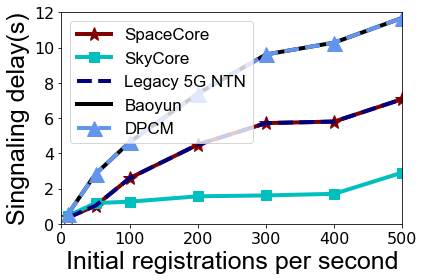

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator


font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}

font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}


xd_delay=0.00183333
isl_delay=0.0020126
skycore=list_add_num(delay_line_skycore,11*xd_delay)


ntn=list_add_num(delay_line_ntn,11*xd_delay)
dpcm=list_add_num(delay_line_tiansuan,11*xd_delay)
spacecore=list_add_num(delay_line_ntn,11*xd_delay)
tiansuan=list_add_num(delay_line_tiansuan,11*xd_delay)

fig, ax = plt.subplots(figsize=(6,4))
plt.ylim(0, 12)
plt.xlim(0, 500)


y_major_locator=MultipleLocator(2)

ax.yaxis.set_major_locator(y_major_locator)
l1=plt.plot(x,spacecore,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')#remove "udmd","pcfd","udrd","ausfd"
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')

plt.xlabel("Initial registrations per second",font1)
plt.ylabel("Singnaling delay(s)",font1)
plt.legend(prop=font2,loc = 'upper left')

ax.tick_params(labelsize=16)


plt.tight_layout()
plt.savefig("figure17a-1.pdf")
plt.show()

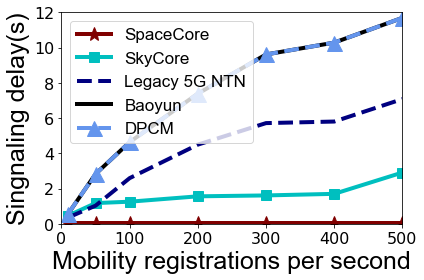

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator


font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}

font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}


'''
初始注册处理延迟：
NTN和spaceCore一致 除了upf，都在地面。所以处理延迟以pc性能为准。 延迟低
tiansuan和DPCM一致 AMF上星，造成处理延迟上升。 延迟最高
skycore 以skycore论文为标准对都在卫星上部署的处理延迟做缩放。

'''
xd_delay=0.00183333
isl_delay=0.0020126
skycore=list_add_num(delay_line_skycore,11*xd_delay)

spacecore=[0 for i in range(len(delay_line_ntn))]
ntn=list_add_num(delay_line_ntn,11*xd_delay)
dpcm=list_add_num(delay_line_tiansuan,11*xd_delay)
spacecore=list_add_num(spacecore,11*xd_delay)
tiansuan=list_add_num(delay_line_tiansuan,11*xd_delay)

fig, ax = plt.subplots(figsize=(6,4))
plt.ylim(0, 12)
plt.xlim(0, 500)


y_major_locator=MultipleLocator(2)

ax.yaxis.set_major_locator(y_major_locator)
l1=plt.plot(x,spacecore,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')#remove "udmd","pcfd","udrd","ausfd"
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')


plt.xlabel("Mobility registrations per second",font1)
plt.ylabel("Singnaling delay(s)",font1)
plt.legend(prop=font2,loc = 'upper left')

ax.tick_params(labelsize=16)


plt.tight_layout()
plt.savefig("figure17c-1.pdf")
plt.show()

In [92]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
y_ntn=[100,100,100,200,100,150,200]
delay_tiansuan=[]
delay_line_tiansuan=[]
delay_ntn=[]
delay_line_ntn=[]
delay_line_skycore=[]
delay_skycore=[]
delay_spacecore=[]
delay_spacecore_line=[]
delay_dpcm=[]
delay_dpcm_line=[]
for i in range(len(x)):
    lines=[]
    with open("data/session/delay/tiansuan/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    send={}
    for line in lines:
        if "Retransmitting PDU Session Establishment Request" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful PSI[2]" in line:
            usr=line.split('[')[2].split("|")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds())
    ms=0
    delay_tiansuan.append(temp_delay)
    if len(temp_delay)==0:
        delay_line_tiansuan.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_line_tiansuan.append(ms/len(temp_delay))

for i in range(len(x)):
    lines=[]
    with open("data/session/delay/ntn/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    send={}
    for line in lines:
        if "Retransmitting PDU Session Establishment Request" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful PSI[2]" in line:
            usr=line.split('[')[2].split("|")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds())
            
    ms=0
    if len(temp_delay)==0:
        delay_line_ntn.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_line_ntn.append(ms/len(temp_delay))

for i in range(len(x)):
    lines=[]
    with open("data/session/delay/spacecore/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay1={}
    temp_delay=[]
    send={}
    for line in lines:
        if "../src/amf/gmm-handler.c:1046" in line:
            usr=line.split(']')[1].split("-")[-1]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")
            # print(usr)
        if "nudm-sdm/v2/imsi" in line and "sm-data (../lib/sbi/client.c:507)" in line:
            usr=line.split('-')[2].split("/")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")-send[usr]).total_seconds())
    ms=0
    if len(temp_delay)==0:
        delay_spacecore.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_spacecore_line.append(ms/len(temp_delay))

for i in range(len(x)):
    lines=[]
    with open("data/session/delay/dpcm/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    send={}
    for line in lines:
        if "../src/amf/gmm-handler.c:1047" in line:
            usr=line.split(']')[1].split("-")[-1]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")
            # print(usr)
        if "nudm-sdm/v2/imsi" in line and "sm-data (../lib/sbi/client.c:507)" in line:
            usr=line.split('-')[2].split("/")[0]
            if usr in send.keys():
                temp_delay.append((datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")-send[usr]).total_seconds())
    ms=0
    if len(temp_delay)==0:
        delay_dpcm.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_dpcm_line.append(ms/len(temp_delay))

for i in range(len(x)):
    lines=[]
    with open("data/session/delay/skycore/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay1={}
    temp_delay=[]
    send={}
    for line in lines:
        if "../src/amf/gmm-handler.c:1047" in line:
            usr=line.split(']')[1].split("-")[-1]
            # print(usr+":in")
            send[usr]=datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")
            # print(usr)
        if "nudm-sdm/v2/imsi" in line and "sm-data (../lib/sbi/client.c:507)" in line:
            usr=line.split('-')[2].split("/")[0]
            if usr in send.keys():
                temp_delay1[usr]=(datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")-send[usr]).total_seconds()
                # print(usr)

        if "(../lib/sbi/client.c:460)" in line and "[200:GET] http://127.0.0.20:7777/nudr-dr/v1/policy-data/ues/imsi-" in line:
            usr=line.split('-')[3].split("/")[0]
            send[usr]=datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")
            # print(usr)
        if "[200:POST] http://127.0.0.5:7777/namf-comm/v1/ue-contexts/imsi" in line and "/n1-n2-messages (../lib/sbi/client.c:460)" in line:
            usr=line.split('-')[3].split("/")[0]
            # print(usr)
            if usr in send.keys() and usr in temp_delay1:
                temp_delay.append((datetime.strptime(line.split('[')[0].split()[-1][:-1],"%H:%M:%S.%f")-send[usr]).total_seconds()+temp_delay1[usr])
    ms=0
    if len(temp_delay)==0:
        delay_line_skycore.append(0)
    else:
        for j in temp_delay:
            ms=ms+j
        delay_line_skycore.append(ms/len(temp_delay))



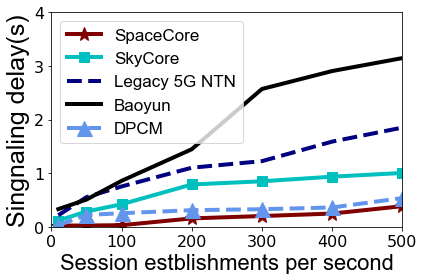

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator


font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 17,
}

font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}


'''
初始注册处理延迟：
NTN和spaceCore一致 除了upf，都在地面。所以处理延迟以pc性能为准。 延迟低
tiansuan和DPCM一致 AMF上星，造成处理延迟上升。 延迟最高
skycore 以skycore论文为标准对都在卫星上部署的处理延迟做缩放。

'''
xd_delay=0.00183333
isl_delay=0.0020126
# skycore_delay=[]
skycore=list_add_num(delay_line_skycore,11*xd_delay)
skycore.sort()

# for i in skycore_delay_temp:
#     skycore_delay.append(i/6)

ntn=list_add_num(delay_line_ntn,11*xd_delay)
dpcm=list_add_num(delay_dpcm_line,11*xd_delay)
dpcm.sort()
spacecore=list_add_num(delay_spacecore_line,11*xd_delay)
spacecore.sort()
tiansuan=list_add_num(delay_line_tiansuan,11*xd_delay)

fig, ax = plt.subplots(figsize=(6,4))
plt.ylim(0, 4)
plt.xlim(0, 500)


y_major_locator=MultipleLocator(1)
#把y轴的刻度间隔设置为10，并存在变量里

ax.yaxis.set_major_locator(y_major_locator)

l1=plt.plot(x,spacecore,color='maroon', marker='*',ms=15,lw=4,label='SpaceCore')
l2=plt.plot(x,skycore,color='c',marker='s',ms=10,lw=4,label='SkyCore')#remove "udmd","pcfd","udrd","ausfd"
l3=plt.plot(x,ntn,linestyle='--', color="navy", lw=4,label='Legacy 5G NTN')
l4=plt.plot(x,tiansuan,color='black',lw=4,label='Baoyun')
l5=plt.plot(x,dpcm,linestyle='--',lw=4, marker='^', color="cornflowerblue", ms=15,label='DPCM')

plt.xlabel("Session estblishments per second",font3)
plt.ylabel("Singnaling delay(s)",font1)
plt.legend(prop=font2,loc="upper left")

ax.tick_params(labelsize=16)

# plt.title("Ping latency")
# plt.plot(time_secs)

# plot latencies for each cycle
# for i in range(max_cycle - 2):      # omit last cycle for lack of data
#     plt.plot(range(1024), latency_of_different_cycles[i], color=(random.random(), random.random(), random.random(), 1))

plt.tight_layout()
plt.savefig("figure17b-1.pdf")
plt.show()